### Gradient Boost 

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

In [25]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [26]:
x= boston.data
y= boston.target

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True)


In [37]:
params = {'n_estimators':500, 'max_depth':5, 'min_samples_split':2, 'learning_rate':0.01,'loss':'ls', 'random_state':100}
clf = GradientBoostingRegressor(**params)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.4f'%mse)

MSE: 6.8369


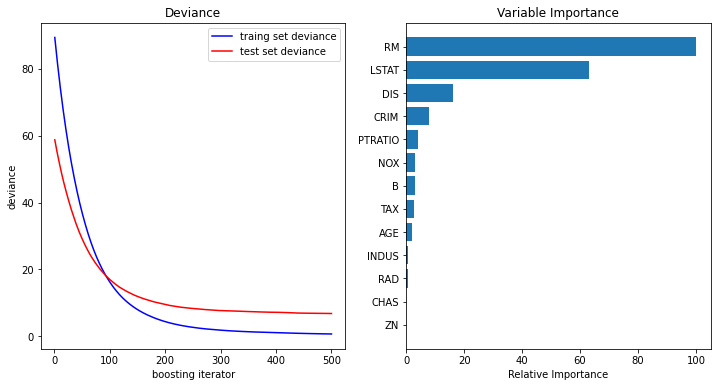

In [50]:
test_score = np.zeros(params['n_estimators'],dtype=np.float64)
for i , y_pred, in enumerate(clf.staged_predict(x_test)):
    test_score[i] = clf.loss_(y_test, y_pred)
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators'])+1, clf.train_score_, 'b-', label = 'traing set deviance')
plt.plot(np.arange(params['n_estimators'])+1, test_score, 'r-', label = 'test set deviance')

plt.legend(loc='upper right')
plt.xlabel('boosting iterator')
plt.ylabel('deviance')

feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()